# Question 1

Introduction:</br>
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.</br></br>
Occupations</br>
Step 1. Import the necessary libraries</br>
Step 2. Import the dataset from this address.</br>
Step 3. Assign it to a variable called users</br>


In [1]:
import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation</br>


In [5]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:\n\n", mean_age_per_occupation, "\n")

Mean age per occupation:

 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64 



Step 5. Discover the Male ratio per occupation and sort it from the most to the least</br>


In [15]:
group_1=users[users['gender']=='M'].groupby('occupation').count()['gender']
group_2=users.groupby('occupation').count()['gender']
result=(group_1/group_2)
print("Male ratio per occupation:")
result.sort_values(ascending=False)

Male ratio per occupation:


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages</br>


In [14]:
print("Minimum and Maximum ages per occupation:\n")
users.groupby('occupation').age.agg([min,max])

Minimum and Maximum ages per occupation:



,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age</br>


In [21]:
mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print("Mean age per occupation and gender:\n\n", mean_age_by_occupation_gender, "\n")

Mean age per occupation and gender:

 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.02

Step 8. For each occupation present the percentage of women and men</br>

In [26]:
male_users = users[users.gender=='M'].groupby(['occupation'])['gender'].agg('count')
female_users = users[users.gender=='F'].groupby(['occupation'])['gender'].agg('count')
total_users = users.groupby(['occupation'])['user_id'].agg('count')

gender_stats = pd.concat([male_users, female_users, total_users], axis=1)
gender_stats.columns = ['Male Users', 'Female Users', 'Total Users']
gender_stats.fillna(0, inplace=True)

gender_stats['Percentage of Women'] = gender_stats["Female Users"]*100/gender_stats["Total Users"]
gender_stats['Percentage of Men'] = gender_stats["Male Users"]*100/gender_stats["Total Users"]
gender_stats[['Percentage of Women', 'Percentage of Men']]


,Percentage of Women,Percentage of Men
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,0.000000,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


# Question 2

Euro Teams</br>
Step 1. Import the necessary libraries</br>
Step 2. Import the dataset from this address</br>
Step 3. Assign it to a variable called euro12</br>


In [28]:
import numpy as np
import pandas as pd
euro12=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column</br>


In [29]:
euro12[['Goals']]


,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


Step 5. How many team participated in the Euro2012?</br>


In [31]:
print("Number of teams participated in Euro2012 are:", euro12['Team'].nunique())

Number of teams participated in Euro2012 are: 16


Step 6. What is the number of columns in the dataset?</br>


In [33]:

print("Number of columns in the dataset are:", len(euro12.columns))

Number of columns in the dataset are: 35


Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline</br>


In [37]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards</br>


In [40]:

print("Teams sorted by Red Cards and Yellow Cards:\n\n", discipline.sort_values(by=['Red Cards', 'Yellow Cards']))

Teams sorted by Red Cards and Yellow Cards:

                    Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


Step 9. Calculate the mean Yellow Cards given per Team</br>


In [42]:

print("Mean Yellow Cards given per Team:\n\n", discipline.groupby('Team')['Yellow Cards'].mean())

Mean Yellow Cards given per Team:

 Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


Step 10. Filter teams that scored more than 6 goals


In [232]:
euro12[euro12['Goals']>6]['Team']


5     Germany
13      Spain
Name: Team, dtype: object

Step 11. Select the teams that start with G</br>

In [44]:
euro12[euro12['Team'].str.startswith('G')]['Team']

5    Germany
6     Greece
Name: Team, dtype: object

Step 12. Select the first 7 columns</br>


In [45]:
euro12.iloc[:, : 7]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3</br>


In [46]:
euro12.iloc[ : , : -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia</br>

In [50]:
euro12.loc[euro12.Team.isin(['England','Italy','Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

Housing</br>
Step 1. Import the necessary libraries</br>
Step 2. Create 3 differents Series, each of length 100, as follows:</br>
• The first a random number from 1 to 4</br>
• The second a random number from 1 to 3</br>
• The third a random number from 10,000 to 30,000</br>


In [53]:
import pandas as pd
import numpy as np

series_1 = pd.Series(np.random.randint(1, 5, size=100))
series_2 = pd.Series(np.random.randint(1, 4, size=100))
series_3 = pd.Series(np.random.randint(10000, 30001, size=100))

print("Series 1:\n", series_1.head())
print("Series 2:\n", series_2.head())
print("Series 3:\n", series_3.head())

Series 1:
 0    1
1    1
2    1
3    2
4    1
dtype: int64
Series 2:
 0    1
1    2
2    3
3    2
4    1
dtype: int64
Series 3:
 0    11873
1    12185
2    29280
3    20890
4    15193
dtype: int64


Step 3. Create a DataFrame by joinning the Series by column</br>


In [57]:
data=pd.concat([series_1,series_2,series_3],axis=1)
series_df=pd.DataFrame(data)
series_df

,0,1,2
0,1,1,11873
1,1,2,12185
2,1,3,29280
3,2,2,20890
4,1,1,15193
...,...,...,...
95,4,3,11257
96,4,1,16340
97,4,1,15809
98,4,2,11222


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter</br>


In [59]:
series_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
series_df

,bedrs,bathrs,price_sqr_meter
0,1,1,11873
1,1,2,12185
2,1,3,29280
3,2,2,20890
4,1,1,15193
...,...,...,...
95,4,3,11257
96,4,1,16340
97,4,1,15809
98,4,2,11222


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'</br>


In [63]:
# Step 5
bigcolumn = pd.concat([series_1, series_2, series_3], axis=0)

# Display the first few elements of the bigcolumn DataFrame
print(bigcolumn)


0         1
1         1
2         1
3         2
4         1
      ...  
95    11257
96    16340
97    15809
98    11222
99    28916
Length: 300, dtype: int64


Step 6. Ops it seems it is going only until index 99. Is it true?</br>


Yes, it's true

Step 7. Reindex the DataFrame so it goes from 0 to 299</br>

In [68]:
bigcolumn.reset_index(inplace=True, drop=True)
bigcolumn

0          1
1          1
2          1
3          2
4          1
       ...  
295    11257
296    16340
297    15809
298    11222
299    28916
Length: 300, dtype: int64

# Question 4

Wind Statistics</br>
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.</br></br>
You should be able to perform all of these operations without using a for loop or other looping construct.</br></br>
The data in 'wind.data' has the following format:</br></br>
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.</br></br>
Step 1. Import the necessary libraries</br>
Step 2. Import the dataset from the attached file wind.txt</br>


In [74]:
import pandas as pd
import numpy as np

wind = pd.read_csv('wind.txt', sep=' ')
wind

,Yr,Mo,Dy,Unnamed: 3,Unnamed: 4,RPT,Unnamed: 6,Unnamed: 7,VAL,Unnamed: 9,...,MUL,Unnamed: 30,Unnamed: 31,CLO,Unnamed: 33,Unnamed: 34,BEL,Unnamed: 36,Unnamed: 37,MAL
0,61,NaN,1.0,NaN,1.00,15.04,14.96,13.17,NaN,9.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,NaN,1.0,NaN,2.00,14.71,NaN,NaN,NaN,10.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61,NaN,1.0,NaN,3.00,18.50,16.88,12.33,10.13,11.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,NaN,1.0,NaN,4.00,10.58,NaN,6.63,11.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,NaN,1.0,NaN,5.00,13.33,13.25,11.42,NaN,6.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12.0,27.0,17.58,16.96,17.62,NaN,8.08,13.21,11.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6570,78,12.0,28.0,13.21,NaN,5.46,13.46,NaN,5.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,78,12.0,29.0,14.00,10.29,14.42,NaN,8.71,NaN,9.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6572,78,12.0,30.0,18.50,14.04,21.29,NaN,9.13,12.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.</br>


In [78]:
data = pd.read_csv('wind.txt', sep="\s+", parse_dates=[[0,1,2]])

data

/var/folders/22/z35s9bw97h1_10sx_1pczn980000gn/T/ipykernel_4576/3157617248.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('wind.txt', sep="\s+", parse_dates=[[0,1,2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.</br>


In [79]:
def date_time(d):
    year = d.year - 100 if d.year > 1989 else d.year
    return datetime.date(year, d.month, d.day)
    
data['Yr_Mo_Dy']  = data['Yr_Mo_Dy'].apply(date_time)

data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].</br>


In [80]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.</br>


In [83]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.</br>


In [84]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.</br>


In [85]:
mean_windspeed = data.mean().mean()
print("Mean windspeed of the windspeeds over all the locations and all the times: ",mean_windspeed)

Mean windspeed of the windspeeds over all the locations and all the times:  10.227982360836938


Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.</br>


In [233]:
print(data.describe(),"\n")
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()
loc_stats

               RPT          VAL          ROS          KIL          SHA  \
count  6568.000000  6571.000000  6572.000000  6569.000000  6572.000000   
mean     12.362987    10.644314    11.660526     6.306468    10.455834   
std       5.618413     5.267356     5.008450     3.605811     4.936125   
min       0.670000     0.210000     1.500000     0.000000     0.130000   
25%       8.120000     6.670000     8.000000     3.580000     6.750000   
50%      11.710000    10.170000    10.920000     5.750000     9.960000   
75%      15.920000    14.040000    14.670000     8.420000    13.540000   
max      35.800000    33.370000    33.840000    28.460000    37.540000   

               BIR          DUB          CLA          MUL          CLO  \
count  6574.000000  6571.000000  6572.000000  6571.000000  6573.000000   
mean      7.092254     9.797343     8.495053     8.493590     8.707332   
std       3.968683     4.977555     4.499449     4.166872     4.503954   
min       0.000000     0.000000     0

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.</br>
A different set of numbers for each day.</br>


In [94]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


Step 11. Find the average windspeed in January for each location.</br>
Treat January 1961 and January 1962 both as January.</br>


In [99]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.</br>


In [105]:
data.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


Step 13. Downsample the record to a monthly frequency for each location.</br>


In [106]:
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


Step 14. Downsample the record to a weekly frequency for each location.</br>


In [107]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.</br>

In [112]:
start_date = '1961-01-02'
end_date = pd.to_datetime(start_date) + pd.DateOffset(weeks=52)

weekly_data = data[start_date:end_date] # Selecting the data within the specified date range

weekly_stats = weekly_data.resample('W').agg(['min', 'max', 'mean', 'std']) #Resampling to get weekly statistics

weekly_stats

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

# Question 5

Step 1. Import the necessary libraries</br>
Step 2. Import the dataset from this address.</br>
Step 3. Assign it to a variable called chipo.</br>


In [113]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep ='\t')

Step 4. See the first 10 entries</br>


In [114]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?</br>


In [115]:
print("number of observations in the dataset are: ",len(chipo))

number of observations in the dataset are:  4622


Step 6. What is the number of columns in the dataset?</br>


In [118]:
print("Number of columns in the dataset are: ",chipo.shape[1])

Number of columns in the dataset are:  5


Step 7. Print the name of all the columns.</br>


In [120]:
print("Columns in the dataset are: \n")
for c in chipo.columns:
  print(c)

Columns in the dataset are: 

order_id
quantity
item_name
choice_description
item_price


Step 8. How is the dataset indexed?</br>


In [121]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?</br>


In [124]:
moi = chipo.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False).index[0]
print("Most-ordered item in the dataset is: ", moi)

Most-ordered item in the dataset is:  Chicken Bowl


Step 10. For the most-ordered item, how many items were ordered?</br>


In [130]:
moi_items = chipo.item_name.value_counts()[0]
print("Items in most-ordered item in the dataset is: ", moi_items)


Items in most-ordered item in the dataset is:  726


Step 11. What was the most ordered item in the choice_description column?</br>


In [132]:
chipo.groupby(['choice_description'])['quantity'].sum().sort_values(ascending=False).index[0]

'[Diet Coke]'

Step 12. How many items were orderd in total?</br>


In [139]:
print("Total number of quantities ordered:", chipo['quantity'].sum())
print("Total number of unique items orders",len(chipo.item_name.unique()))

Total number of quantities ordered: 4972
Total number of unique items orders 50


Step 13.</br>
• Turn the item price into a float</br>
• Check the item price type</br>
• Create a lambda function and change the type of item price</br>
• Check the item price type</br>


In [141]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("Item price type after conversion:", chipo['item_price'].dtype)

Item price type after conversion: float64


Step 14. How much was the revenue for the period in the dataset?</br>


In [144]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue for the period:", revenue)

Revenue for the period: 39237.02


Step 15. How many orders were made in the period?</br>


In [146]:
orders = chipo['order_id'].nunique()
print("Number of orders made:", orders)

Number of orders made: 1834


Step 16. What is the average revenue amount per order?</br>


In [149]:
average_revenue_per_order = revenue / orders
print("Average revenue amount per order:", average_revenue_per_order)

Average revenue amount per order: 21.39423118865867


Step 17. How many different items are sold?</br>

In [152]:
print("Number of different items are sold:", len(chipo["item_name"].unique()))

Number of different items are sold: 50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.</br>
Don't forget to label your axes!

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


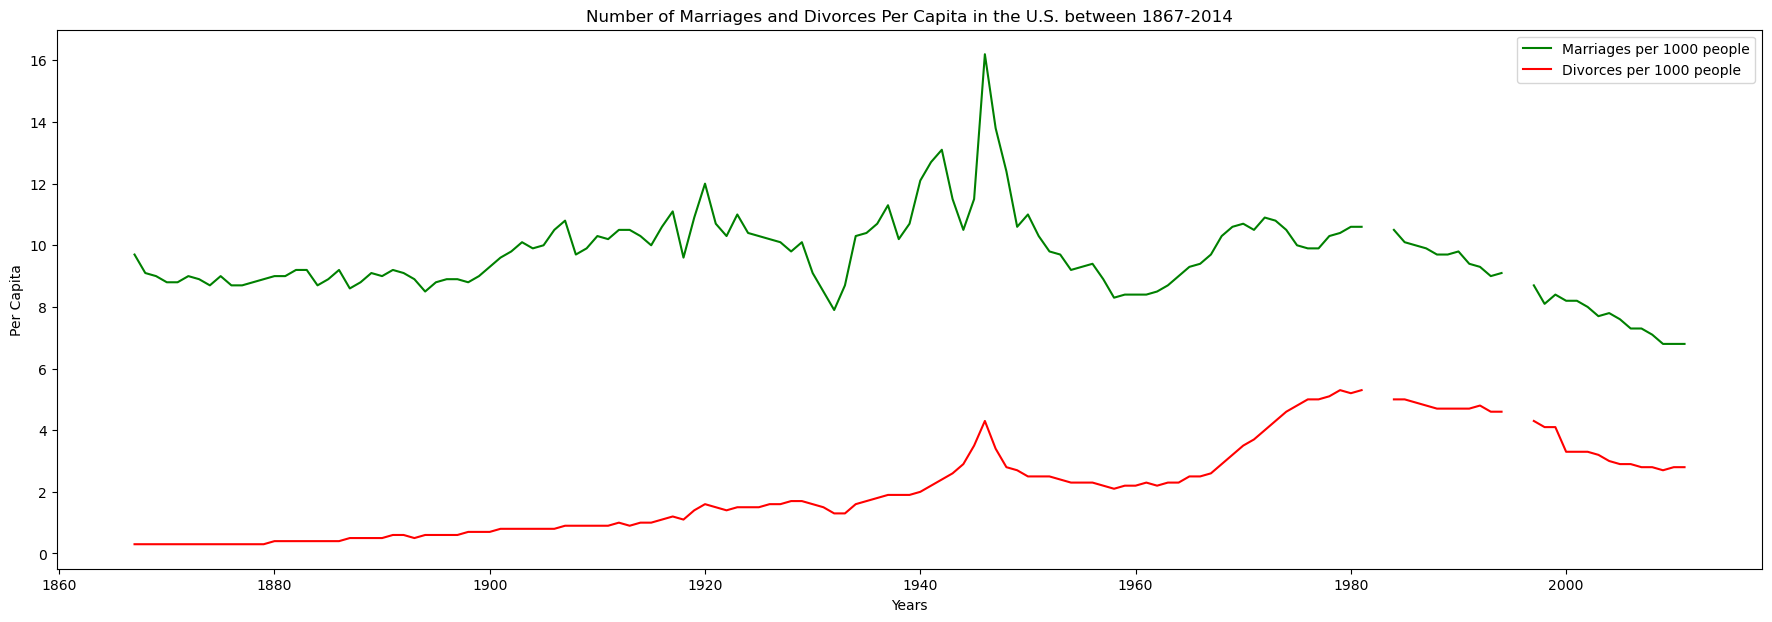

In [163]:
# Creating a line plot
plt.figure(figsize=(22, 7))
plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages per 1000 people', color='green')
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces per 1000 people', color='red')
plt.xlabel('Years')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces Per Capita in the U.S. between 1867-2014')
plt.legend()
plt.show()
     

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.</br>
Don't forget to label your axes!

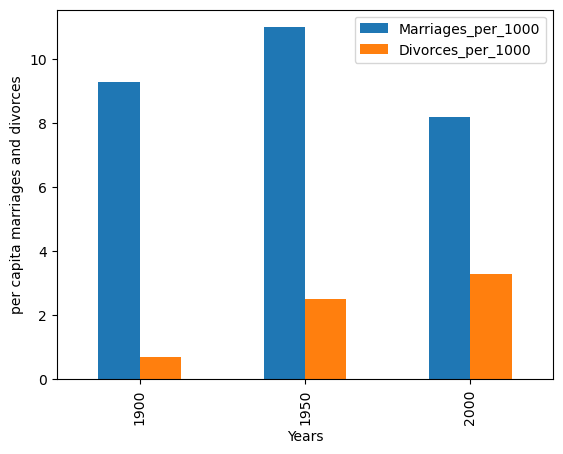

In [166]:
b=df[(df['Year'].isin([1900,1950,2000]))]
x=b.plot.bar(x='Year',y=['Marriages_per_1000','Divorces_per_1000'],xlabel='Years',ylabel='per capita marriages and divorces')

# Question 8 

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. </br>
Don't forget to label your axes!

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

actor_data = pd.read_csv('actor_kill_counts.csv')

actor_data


,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


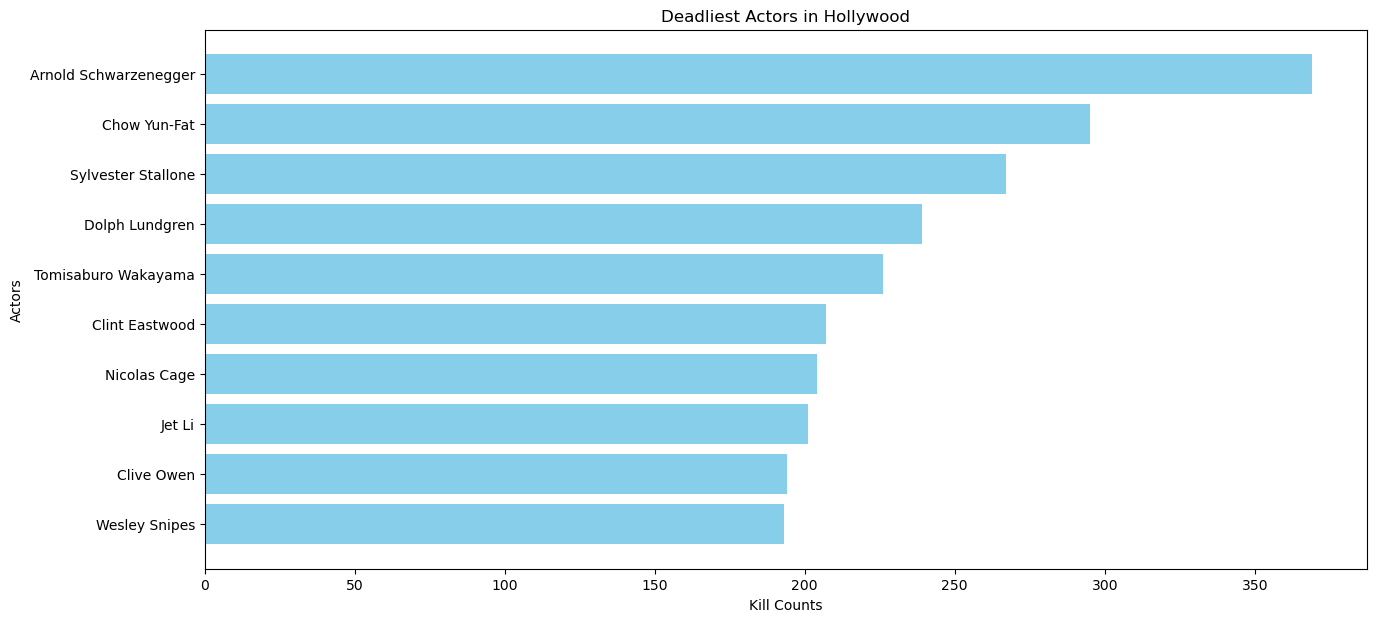

In [235]:

actor_data.sort_values(['Count'], inplace=True, ascending=True) # Sorting the data

# Plotting
plt.figure(figsize=(15, 7))
plt.barh(actor_data['Actor'], actor_data['Count'],color='skyblue')
plt.xlabel('Kill Counts')
plt.ylabel('Actors')
plt.title('Deadliest Actors in Hollywood')
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.</br>
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [198]:
import matplotlib.pyplot as plt
import pandas as pd

emperor_data = pd.read_csv('roman-emperor-reigns.csv')

emperor_data


,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


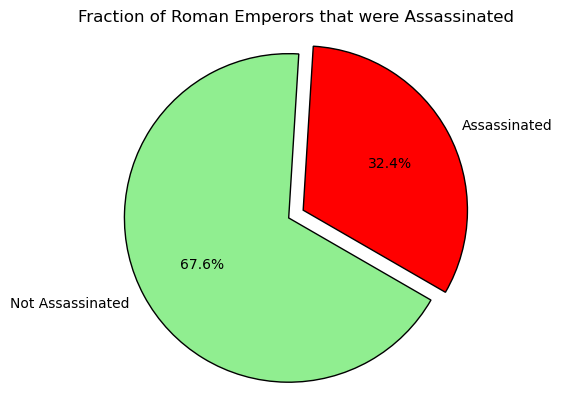

In [217]:

assa_emperors = emperor_data[emperor_data['Cause_of_Death'] == 'Assassinated']

num_assa = len(assa_emperors)
num_not_assa = len(emperor_data) - num_assa

frac_assa = num_assa / len(emperor_data)

labels = ['Assassinated', 'Not Assassinated']
sizes = [frac_assa, 1 - frac_assa]
explode = (0.05, 0.05)


colors = ['red', 'lightgreen'] # Defining colors for the pie chart

# Creating a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=330, colors=colors, wedgeprops={'edgecolor': 'black'})
ax.axis('equal')
ax.set_title('Fraction of Roman Emperors that were Assassinated')

# Display the pie chart
plt.show()


# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.</br>
Don't forget to label your axes!</br>
Color each dot according to its year.</br>

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

arcade_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


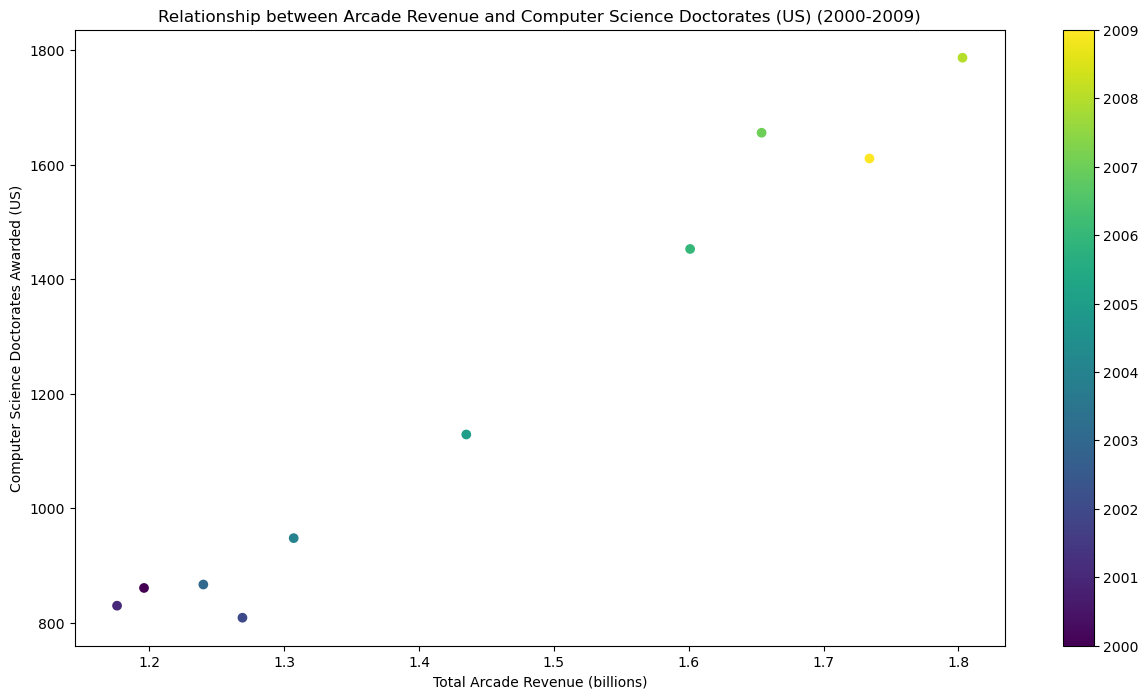

In [237]:
plt.figure(figsize=(15, 8))
scatter_plot = plt.scatter(arcade_data['Total Arcade Revenue (billions)'], arcade_data['Computer Science Doctorates Awarded (US)'], c=arcade_data['Year'], cmap='viridis')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates (US) (2000-2009)')
plt.colorbar(scatter_plot)
plt.show()
